<a target="_blank" href="https://colab.research.google.com/github/tuankhoin/CO3057-Computer-Vision/blob/main/Week_3_Filtering.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import os

try:
  from google.colab import drive
  drive.mount('/content/gdrive')
  path = "gdrive/My Drive/Lectures/CO3057 CV"
  os.chdir(path)
except:
  path = ''
  os.getcwd()

import warnings
warnings.filterwarnings('ignore')

Ho Chi Minh University of Technology (HCMUT)

CO3057 - Digital Image Processing and Computer Vision

# Week 3 - Filtering

By the end of this section, you should be able to:

Spatial Filtering:
* Explain **convolution** and **cross-correlation**
* Identify commonly used **spatial filters** and their effects
* Explain practical considerations:
  * Computational efficiency
  * Border handling strategies

Frequency Filtering:
- Explain at a conceptual level how images are represented in the frequency domain
- Implement filters in the frequency domain
- Explain how frequency representations are used for image compression and analysis
- Know how wavelets work
- Compare wavelets and Fourier transform.

In [ ]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

--2026-01-24 15:28:18--  https://danviet-24h.ex-cdn.com/files/upload/2-2021/images/2021-06-26/42725836-adf9-4fc7-8764-9f671109ee3a-1624678195-502-width600height400.jpeg
Resolving danviet-24h.ex-cdn.com (danviet-24h.ex-cdn.com)... 172.67.75.116, 104.26.11.79, 104.26.10.79, ...
Connecting to danviet-24h.ex-cdn.com (danviet-24h.ex-cdn.com)|172.67.75.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34596 (34K) [image/jpeg]
Saving to: ‘img.jpeg’

img.jpeg            100%[===================>]  33.79K  --.-KB/s    in 0.001s  

2026-01-24 15:28:19 (62.2 MB/s) - ‘img.jpeg’ saved [34596/34596]



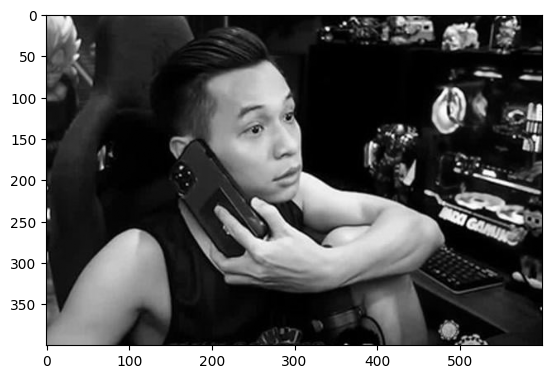

In [ ]:
!wget https://danviet-24h.ex-cdn.com/files/upload/2-2021/images/2021-06-26/42725836-adf9-4fc7-8764-9f671109ee3a-1624678195-502-width600height400.jpeg -O img.jpeg

# read in an image from a filepath as graycsale.
img = cv2.imread(path + "img.jpeg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.show()

---
# Part 1: Spatial Filtering
---



## Pixel Operators

A **pixel operator** computes an output value using **only the input pixel itself**.

$$
\underbrace{g(i,j)}_{\text{output image}} = h\big(\underbrace{f(i,j)}_{\text{input image}}\big)
$$

Example:
$$
g(i,j) = 0.5 \times f(i,j)
$$

This applies a simple transformation independently to each pixel.

Limitations
* No information from neighboring pixels
* Cannot detect edges, textures, or local structure

➡️ This motivates **local operators**


### Example: Gamma Correction

Gamma correction modifies pixel intensities non-linearly:

$$
g(i,j) = f(i,j)^{\gamma}
$$

Effects on intensity histogram:

* ($\gamma$ < 1): image becomes brighter
* ($\gamma$ > 1): image becomes darker

⇒ *Histogram shifts left or right accordingly*

---

## Local Operators

A **local operator** computes each output pixel using a **neighborhood** around that pixel.

$$
g(i,j) = h\big({f(i+u,j+v)}\big)
$$

Example:

* Sharpening filters
* Blurring filters
* Edge detection filters

---

## Linear Filtering

In **linear filtering**, the output pixel is a **weighted sum** of its neighborhood.

$$
\underbrace{g(i,j)}_{\text{output}} =
\underbrace{h(u,v)}_{\text{kernel}} \otimes
\underbrace{f(i,j)}_{\text{input}}
$$

Here, the operation is either:
 - $\otimes$ **cross-correlation**
 - \* **convolution**

### Cross-Correlation

Defined as:

$$
g(i,j) = h(u,v) \otimes f(i,j) = \sum_{u,v} f(i+u, j+v)\;h(u,v)
$$

Interpretation:

* Treat the kernel as a sliding window
* Multiply overlapping pixels
* Sum the results
* Assign to the center pixel

### Convolution

Convolution is similar to cross-correlation, but with a **flipped kernel**.

$$
g(i,j) = h(u,v) * f(i,j) = \sum_{u,v} f(i-u, j-v)\;h(u,v)
$$

Key difference:

* Kernel is flipped horizontally **and** vertically before sliding

### Cross-Correlation vs. Convolution

* **Cross-correlation**: overlay kernel directly
* **Convolution**: flip kernel first, then overlay

For symmetric kernels (e.g. Gaussian), results are identical.


---

# Convolution steps

![](https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3convolve.gif?raw=true)


![](https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3convolve.png?raw=true)


## Sliding the Kernel

1. Place kernel on image
2. Multiply overlapping values
3. Sum results
4. Slide one pixel and repeat

This produces the **cross-correlation output image**.

## Convolution vs Cross-correlation

![](https://towardsdatascience.com/wp-content/uploads/2019/11/1RhHoldDIzmca3ula71tkFg.png)

![](https://towardsdatascience.com/wp-content/uploads/2019/11/1DJIJX1Adlo_DzKo63IBYSg.png)

Think: When will they produce the same results?

### Code

The [`cv2.filter2D(src, ddepth, kernel)`](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) operation convolve a kernel with an image.

The `filter2D()` function requires three input arguments:

- The first argument is the source image.

- The second argument is ddepth, which indicates the depth (no. bits used to represent color in each pixel) of the resulting image. A value of -1 indicates that the final image will also have the same depth as the source image **(probably doesn't matter much, leave it to -1 should be fine in most cases)**.

- The final input argument is the kernel, which we apply to the source image.

array([[255, 255, 255, ...,   3,   3,   3],
       [255, 255, 255, ...,   3,   3,   3],
       [255, 255, 255, ...,   2,   2,   2],
       ...,
       [255, 255, 255, ...,  30,  31,  31],
       [255, 255, 255, ...,  31,  31,  32],
       [255, 255, 255, ...,  32,  32,  32]], dtype=uint8)
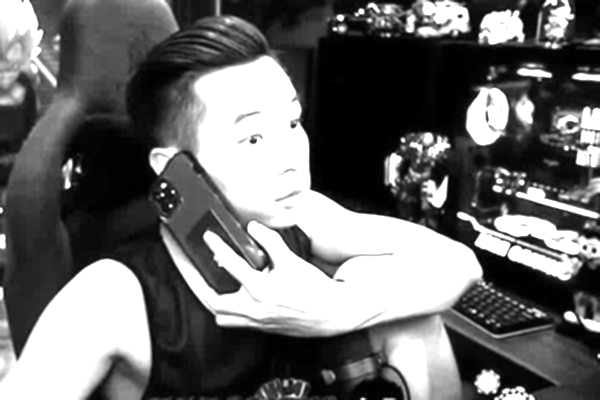

In [ ]:
cv2.filter2D(img, -1, np.ones((3,3)) / 4)

# If you wanted to use cross correlation, just flip the kernel
# cv2.filter2D(img, -1, np.flip(kernel))

---

# Common Filters

| Filter                  | Kernel / Formula                                                                 | Effect                                                                 |
|--------------------------|----------------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Identity**             | $$\begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}$$            | Output identical to input; No change applied                         |
| **Shift Filter**         | $$\begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix}$$            | Each pixel takes value from neighbor; Image shifts spatially         |
| **Sharpening Filter**    | $$\begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$$        | Emphasizes differences with neighbors; Enhances fine details & edges |
| **Gaussian Filter**      | $$G_\sigma(x,y) = \frac{1}{2\pi\sigma^2}\exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$$ | Nearby pixels weighted more; Distant pixels weighted less ⟶ Produces natural blur |
| **Sobel (Horizontal)**   | $$\begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$$         | Detects horizontal edges                                               |
| **Sobel (Vertical)**     | $$\begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$$         | Detects vertical edges                                                 |

Most filters sum to 1. Do you notice why?




## Gaussian vs. Average Blur
![gaussian](https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3gaussian.png)

![](https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3gauss_vs_avg.png?raw=true)

* **Average filter**: equal weights → streak artifacts
* **Gaussian filter**: smooth decay → visually smoother blur


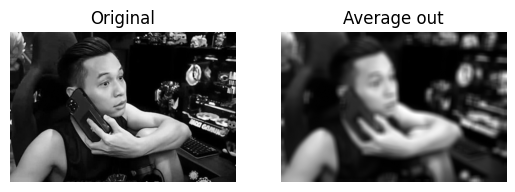

In [ ]:
# average filter
avg_kernel = np.ones((15,15),np.float32)/225
avg_out = cv2.filter2D(img,-1,avg_kernel)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(avg_out,cmap='gray')
plt.title('Average out')
plt.axis('off')
plt.show()

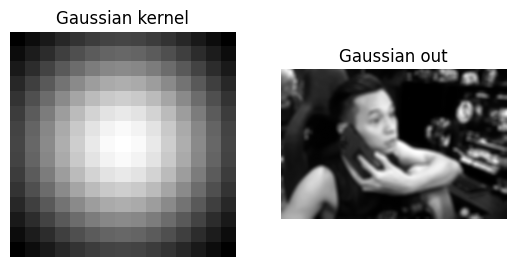

In [ ]:
# Gaussian filter size 15

# 1D gaussian kernel (size, sigma)
gau_kernel = cv2.getGaussianKernel(15,5)
# Make it 2D
gau_kern2d = np.outer(gau_kernel, gau_kernel)
# Remember, we have to normalize the filters to 1 every time!
gau_kern2d = gau_kern2d / gau_kern2d.sum()
# Now we filter!
gau_out = cv2.filter2D(img,-1,gau_kern2d)

plt.subplot(1,2,1)
plt.imshow(gau_kern2d,cmap='gray')
plt.title('Gaussian kernel')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gau_out,cmap='gray')
plt.title('Gaussian out')
plt.axis('off')
plt.show()

## Sobel Filters
![](https://df6asyv2kv4zi.cloudfront.net/what-are-sobel-and-scharr-derivatives-opencv/images/sobel.png)

Sobel filters approximate image derivatives. They combine:
* Smoothing
* Edge detection

> The following is the syntax for applying Sobel edge detection using OpenCV:
- [`cv2.Sobel(src, ddepth, dx, dy)`](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)


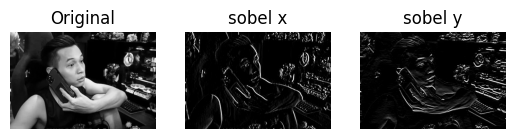

In [ ]:
# X-Direction Kernel (Vertical)
sobel_kernel_x =  np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
# Y-Direction Kernel (Horizontal)
sobel_kernel_y =  np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

sobel_out_x = cv2.filter2D(img,-1,sobel_kernel_x)
sobel_out_y = cv2.filter2D(img,-1,sobel_kernel_y)

plt.subplot(1,3,1)
#the figure has 1 row, 3 columns, and this plot is the first plot.
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
#the figure has 1 row, 3 columns, and this plot is the second plot.
plt.imshow(sobel_out_x,cmap='gray')
plt.title('sobel x')
plt.axis('off')

plt.subplot(1,3,3)
#the figure has 1 row, 2 columns, and this plot is the third plot.
plt.imshow(sobel_out_y,cmap='gray')
plt.title('sobel y')
plt.axis('off')

plt.show()


## Filtering on Colored Images

Results so far have been applying on 2D images (i.e. grayscale). What about #D colored images?

For an image of size $H \times W \times 3$:

* Apply filtering **per channel**
* Each channel has its own kernel

Example:

* Kernel weights (1,0,0) → extract red channel only

---

# Filter Design Concepts

## Filter Size vs. Filter Support

Two kernels that have same size but different variable may produce different results. Gaussian filter example:

- Larger $\sigma$: Wider support + Stronger blur
- Smaller $\sigma$: More local influence + Sharper output

Why? Bigger σ will put more distant neighbors to the weighted average -> Diffusing the colors.

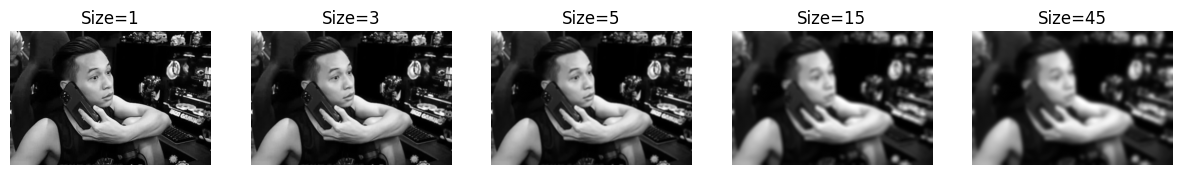

In [ ]:
ks = [1,3,5,15,45]
_,ax = plt.subplots(1, len(ks), figsize=(len(ks)*3,3))

for i,k in enumerate(ks):
  # a 2d Gaussian kernel can be decomposed into 2 1D
  gau_kernel = cv2.getGaussianKernel(k,5)# 1d gaussian kernel (size, sigma)
  gau_kernel = gau_kernel/gau_kernel.sum()
  gau_out = cv2.sepFilter2D(img,-1,gau_kernel,gau_kernel)

  ax[i].imshow(gau_out, cmap='gray')
  ax[i].set_title(f'Size={k}')
  ax[i].axis('off')



## Custom Filter Examples

* **Diagonal edges detection**
* **Motion blur** (along an axis)
* Make image more yellowy

How can you implement these filters?

## Helpful resource
This is a good [demo](https://setosa.io/ev/image-kernels/) where you can look at convolution demonstrations and try out the effects of adjusting kernel parameters.

---

# Properties of Convolution

## Algebraic Properties

| Property       | Formula                                                                 | Notes                                                                 |
|----------------|-------------------------------------------------------------------------|----------------------------------------------------------------------|
| **Commutative**| $$f * h = h * f$$                                                       | Theoretically, no difference between kernel and image          |
| **Associative**| $$ (f * h_1) * h_2 = f * (h_1 * h_2) $$                                 | Usually one option is faster than the other - allows for more efficient implementations |
| **Distributive**| $$ f * (h_1 + h_2) = f * h_1 + f * h_2 $$                              | Enables combining filters.    |
| **Scaling**    | $$ kf * h = f * (kh) = k(f * h) $$                                      | Scalar multiplication can be applied before, during, or after convolution. |


---

# Efficient Filtering

## Combining Filters

Instead of applying multiple filters sequentially:

* Combine kernels first
* Apply convolution once

This reduces computation significantly.

![](https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3kernelproduct.png?raw=true)


---

## Separable Filters `cv2.sepFilter2D`

Some 2D filters can be expressed as **two 1D filters**.

Gaussian example:

$$
G_\sigma(x,y) =
\left(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{x^2}{2\sigma^2}}\right)
\left(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{y^2}{2\sigma^2}}\right)
$$

Effect:

* 2D convolution → two 1D convolutions
* Much faster

![](https://github.com/tuankhoin/CO3057-Computer-Vision/blob/main/assets/w31d.png?raw=true)



2x 1D convolution Time:  0.00227 sec
2D convolution Time:  0.03320 sec


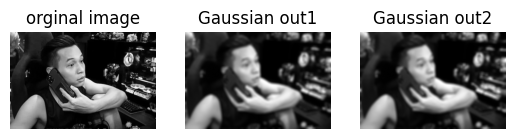

In [ ]:
import timeit

# Gaussian filter size 15
# a 2d Gaussian kernel can be decomposed into 2 1D
gau_kernel = cv2.getGaussianKernel(15,5) # 1d gaussian kernel (size, sigma)
gau_kernel=gau_kernel/gau_kernel.sum()

start = timeit.default_timer()
# Applies separable filters to the image.
gau_out1 = cv2.sepFilter2D(img,-1,gau_kernel,gau_kernel)
# this is equivant to cv2.GaussianBlur(img,(15,15),5)
stop = timeit.default_timer()
print(f'2x 1D convolution Time: {stop - start: .5f} sec')

gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d=gau_kern2d/gau_kern2d.sum()

start = timeit.default_timer()
gau_out2 = cv2.filter2D(img,-1,gau_kern2d)
stop = timeit.default_timer()
print(f'2D convolution Time: {stop - start: .5f} sec')


plt.subplot(1,3,1)
plt.imshow(img,cmap='gray' )
plt.title('orginal image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gau_out1,cmap='gray')
plt.title('Gaussian out1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gau_out2,cmap='gray')
plt.title('Gaussian out2')
plt.axis('off')

plt.show()


---

# Border Handling methods

* Output image is smaller (think why)
* Kernel must fully overlap image

This is often undesirable in practice -> Needs handling method to retain size.

Solution: Pad extra pixel borders on 4 edges

## Zero Padding

* Pad image with zeros
* Keeps output size
* Introduces dark borders

## Wrap Padding

* Image wraps around itself
* Useful for textures
* Causes edge blending artifacts in photos

## Clamp / Replicate Padding

* Extend edge pixel values outward
* Often best for natural images

## Reflect Padding

* Mirror image at borders
* Preserves continuity
* Common in image processing libraries




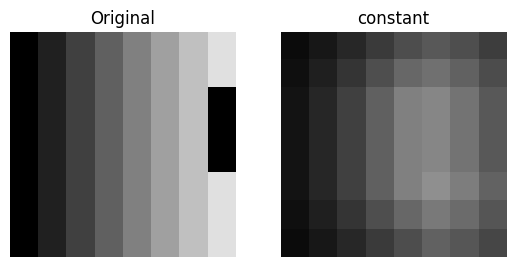

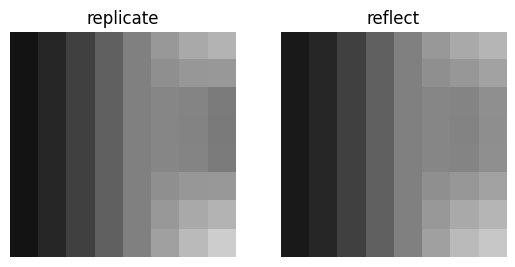

In [ ]:
img2 = np.tile(np.arange(8, dtype=np.uint8)*32, (8,1))
img2 = cv2.merge([img2,img2,img2])  # make it 3-channel grayscale
img2[2:5,7] = 0

gau_kernel = cv2.getGaussianKernel(5,5)# 1d gaussian kernel (size, sigma)
gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d = gau_kern2d/gau_kern2d.sum()

#Various border types, image boundaries are denoted with |
gau_out1 = cv2.filter2D(img2,-1,gau_kern2d, borderType = cv2.BORDER_CONSTANT ) #iiiiii|abcdefgh|iiiiiii
gau_out2 = cv2.filter2D(img2,-1,gau_kern2d, borderType = cv2.BORDER_REPLICATE) #aaaaaa|abcdefgh|hhhhhhh
gau_out3 = cv2.filter2D(img2,-1,gau_kern2d, borderType = cv2.BORDER_REFLECT  ) #fedcba|abcdefgh|hgfedcb

plt.subplot(1,2,1)
plt.imshow(img2,cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gau_out1,cmap='gray')
plt.title('constant')
plt.axis('off')

plt.show()

plt.subplot(1,2,1)
plt.imshow(gau_out2,cmap='gray')
plt.title('replicate')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(gau_out3,cmap='gray')
plt.title('reflect')
plt.axis('off')
plt.show()

---

# Practical Considerations

* Filtering is computationally expensive. So need to choose efficient implementations
* Appropriate border handling has no universal best choice:
  * Wrap is good for textures
  * Clamp / reflect can be good for photos


---
# Part 2: Frequency Filtering
---

![](https://www.thepulsar.be/images/generating-sine-wave-from-square-waves/sine2.png)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Fourier_Series.svg/960px-Fourier_Series.svg.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif)

- **Fourier Series**: Any signal or pattern can be described/approximated as a sum of sinusoids
- **Fourier in images**: Any image can be represented as a sinusoidal wave of signals

---

## Fourier Transform
* Decomposes a signal into its **frequency components**
* Each frequency is represented by a **complex number**:

  * **Magnitude** → strength (amplitude)
  * **Angle** → phase shift

### Domains

* **1D signals**:
  time domain → frequency domain
* **Images**:
  spatial domain → frequency domain

### Continuous Fourier Transform

$$
F(\omega) = \int_{-\infty}^{\infty}
f(x), e^{-2 i \pi \omega x}, dx
$$

* $f(x)$: original signal
* $F(\omega)$: frequency representation

In Practice (Python):
* `np.fft.fft` → 1D signals
* `np.fft.fft2` → 2D images
* `np.fft.fftn` → N-dimensional data

`scipy` also has these same functions as `numpy`.

### Inverse Fourier Transform

* Converts **frequency domain → original domain**
* Perfect reconstruction (up to numerical error)


In [ ]:
def FFT_image(img, log = False):
    # Fast Fourier transform
    f = np.fft.fft2(img)

    # Shift the low frequency component to the center
    f = np.fft.fftshift(f)

    # Fourier phase and magnitude
    phase = np.angle(f)
    magnitude = np.abs(f)

    #Figure size in inches (default)
    plt.subplots(figsize=(10, 3))
    plt.axis('off')

    # Original image
    plt.subplot(1,3,1)
    plt.imshow(img ,cmap='gray')
    plt.title('Image')
    plt.axis('off')

    # Phase
    plt.subplot(1,3,2)
    plt.imshow(phase ,cmap='gray')
    plt.title('Phase')
    plt.axis('off')

    # Magnitude
    plt.subplot(1,3,3)
    plt.imshow(magnitude if not log else np.log(magnitude),cmap='gray')
    plt.title('Magnitude')
    plt.axis('off')

    plt.show()

---

## Frequency Domain (Signal)

- The height of the bars represents the amplitude $A$ and the $x$ axis represents the frequency $\omega$

![](https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3freqdom.png?raw=true)

- The zero frequency represents the mean amplitude

![](https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3polar.png?raw=true)

- Values in frequency domain are complex numbers
- For each **frequency**: magnitude (**amplitude**) and angle (**phase**)

---

# Frequency Domain for Images

![](https://github.com/tuankhoin/CO3057-Computer-Vision/blob/main/assets/w3sinusoid.png?raw=true)

* Slicing an image produces 1D signals
* Wave height corresponds to pixel brightness
* Images can be viewed as 2D combinations of sinusoids

## Fourier Transforms of Images


![](https://github.com/tuankhoin/CO3057-Computer-Vision/blob/main/assets/w3magnitude.png?raw=true)

* Fourier transforms of images are **symmetric**
* Black regions represent near-zero values
* Bright spots correspond to strong frequencies
* Greater spacing between peaks → higher frequency
* Rotation in image space causes rotation in frequency space

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTg6xWXc8euEdEQgsKoOmRU4ui_Dq_zDasnKA&s)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9G21S3yWB186HW9rAl9e6JYt0vFo9b72Rjg&s)

In [ ]:
%%shell
for i in {1..10}; do
  wget -O F1.$i.png "https://raw.githubusercontent.com/tuankhoin/COMP90086-Practical-Solutions/master/Week%203/F1.$i.png"
done

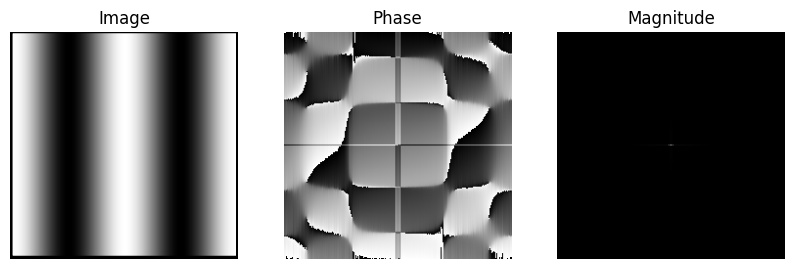

In [ ]:
img = cv2.imread(path + "F1.1.png",cv2.IMREAD_GRAYSCALE)
FFT_image(img)

---

## Characteristics

### Combining Fourier Transforms
* Fourier transforms of multiple patterns can be combined
* Square waves introduce many frequency components

![](https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3fourieradd.png?raw=true)

### Directional Patterns

* Square waves in multiple directions create frequency components in all directions


### Real Images

* Real image Fourier transforms often show:

  * Central peak → mean brightness
  * Directional streaks → oriented structures (edges, textures)

### Repeating Patterns

* Repeated dots create striped frequency patterns

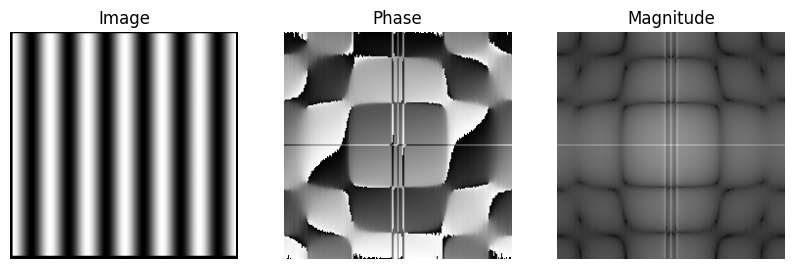

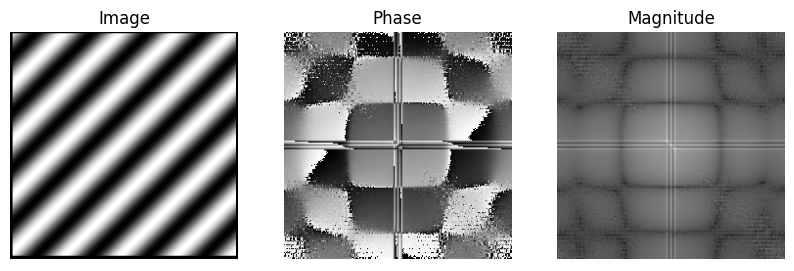

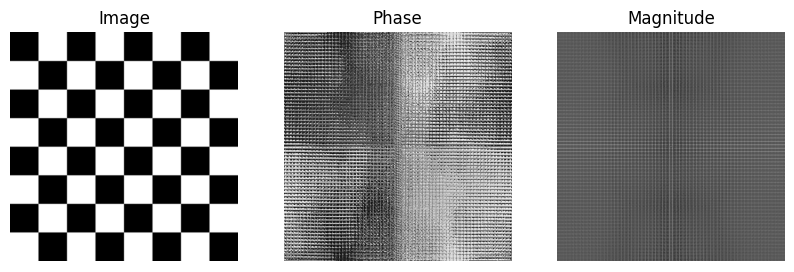

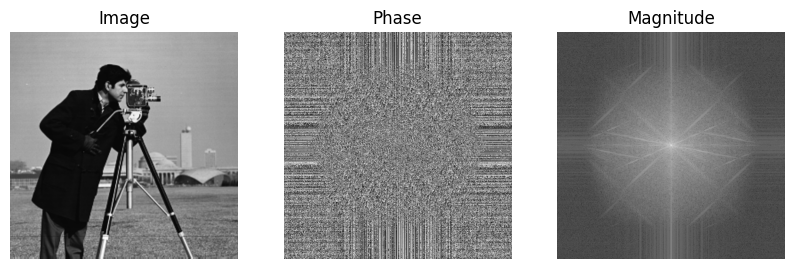

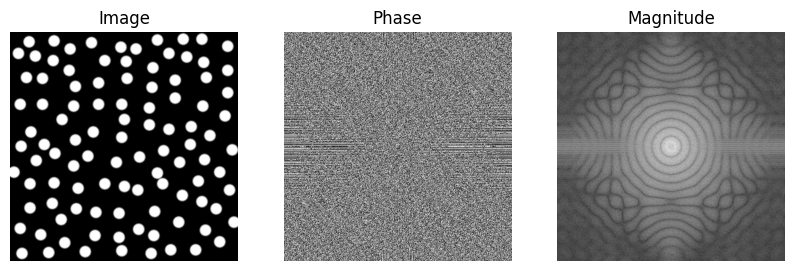

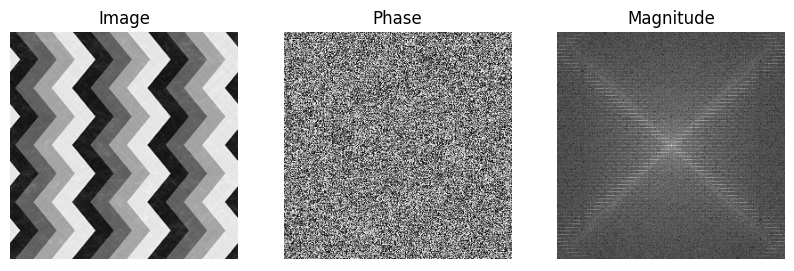

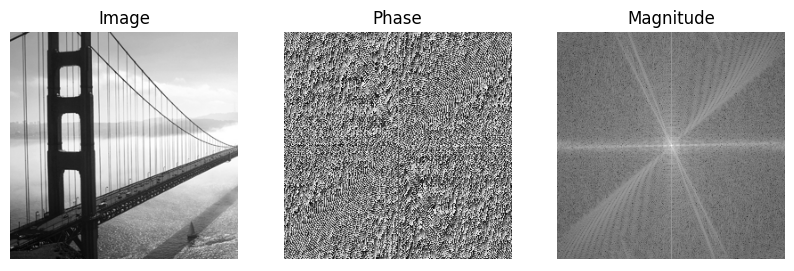

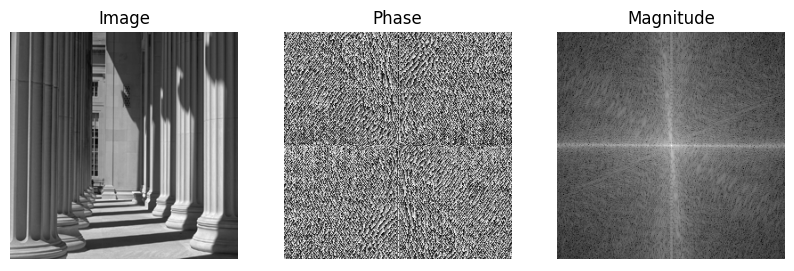

In [ ]:
for i in range(2,10):
  img = cv2.imread(path + f"F1.{i}.png",cv2.IMREAD_GRAYSCALE)
  FFT_image(img, log = True)

### Phase

* Phase preserves **edges and structure**
* Magnitude captures **texture and global appearance**
* Swapping phase and magnitude shows structure comes mainly from phase

In [ ]:
!wget "https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3conca.jpg"
!wget "https://raw.githubusercontent.com/tuankhoin/CO3057-Computer-Vision/refs/heads/main/assets/w3concho.jpg"

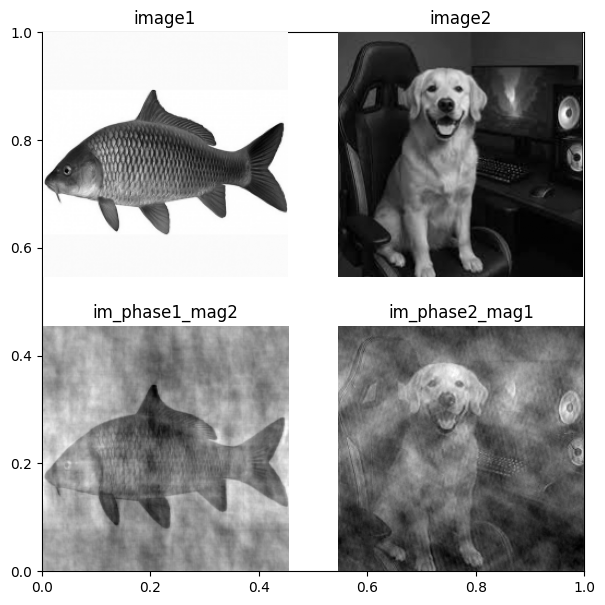

In [ ]:
img1 = cv2.imread(path + "w3conca.jpg",cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1,(225,225))

# Fourier transform
f = np.fft.fft2(img1)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase1 = np.angle(f)
magnitude1 = np.abs(f)

img2 = cv2.imread(path + "w3concho.jpg",cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2,(225,225))

# Fourier transform
f = np.fft.fft2(img2)
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase2 = np.angle(f)
magnitude2 = np.abs(f)

phase1_mag2 = np.multiply(magnitude2, np.exp(1j*phase1))
phase2_mag1 = np.multiply(magnitude1, np.exp(1j*phase2))


# fftshift -> ifftshift
# (Invert of FFT(Shift the low-frequency component back to original location))
im_phase1_mag2 = np.real(np.fft.ifft2(np.fft.ifftshift(phase1_mag2)))
im_phase2_mag1 = np.real(np.fft.ifft2(np.fft.ifftshift(phase2_mag1)))


#Figure size
plt.subplots(figsize=(7, 7))

plt.subplot(2,2,1)
plt.imshow(img1 ,cmap='gray')
plt.title('image1')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img2 ,cmap='gray')
plt.title('image2')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(im_phase1_mag2, cmap='gray')
plt.title('im_phase1_mag2')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(im_phase2_mag1 ,cmap='gray')
plt.title('im_phase2_mag1')
plt.axis('off')

plt.show()

#What aspects of the image are captured by the magnitude and the phase of the FT?

Fourier itself is a big world of representations. Have a look at this visualization website to explore more:

https://www.jezzamon.com/fourier/

---

# Frequncy Filtering & Compression

## Operations in Frequency Domain

* Equivalence: Spatial domain ↔ frequency domain operations
* Convolution becomes multiplication

$$
FT[h * f] = FT[h];FT[f]
$$

* Inverse relationship:

$$
FT^{-1}[hf] = FT^{-1}[h] * FT^{-1}[f]
$$

## Low-Pass Filter

* Keeps **low spatial frequencies**
* Removes high frequencies (fine detail)
* Implemented by retaining values near the center of the spectrum
* Hard circular filters introduce **ringing artifacts**

## High-Pass Filter

* Keeps **high spatial frequencies**
* Removes low frequencies (smooth regions)
* Enhances edges and fine detail

## Bandpass Filter
* Low-pass + High-pass combined
* Removes a **range of frequencies**
* Keeps frequencies within a specified band

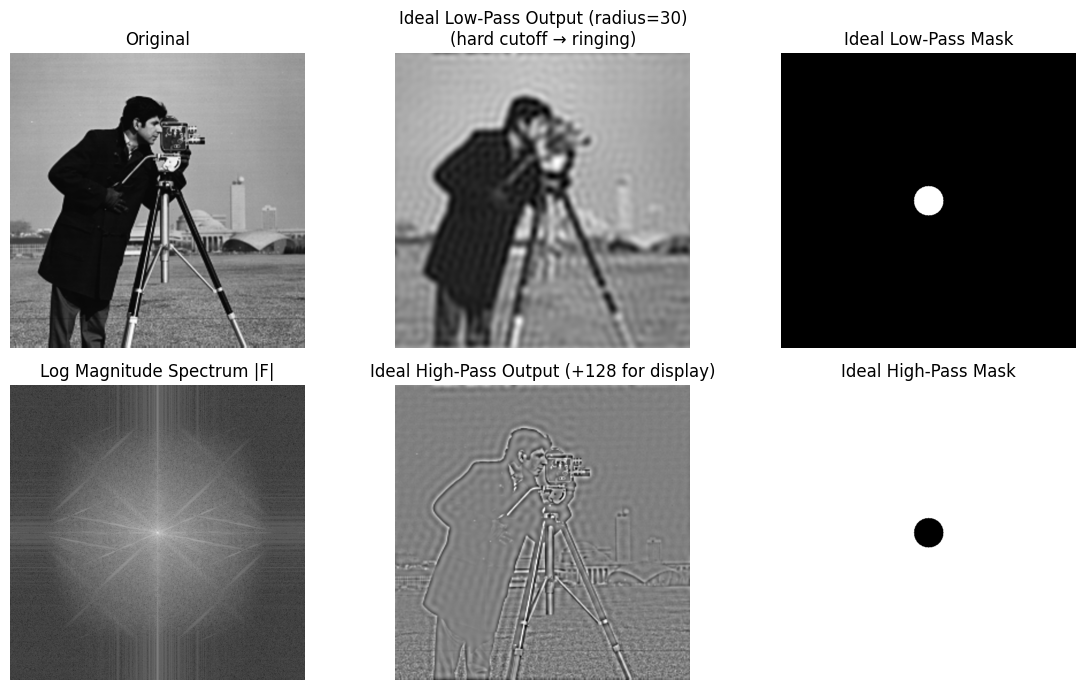

In [ ]:
# @title
# --- Params ---
radius = 30  # try 10, 20, 40 to see ringing strength change

# --- Load grayscale image ---
img = cv2.imread(path + "F1.5.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Check `path` and filename.")

img_f = img.astype(np.float32)

# --- FFT (shifted so DC is at center) ---
F = np.fft.fftshift(np.fft.fft2(img_f))

# --- Ideal (hard) circular LOW-PASS mask (this causes ringing) ---
m, n = img_f.shape
y = np.arange(m) - (m // 2)
x = np.arange(n) - (n // 2)
Y, X = np.meshgrid(y, x, indexing="ij")
D2 = X*X + Y*Y

mask_low_ideal = (D2 <= radius*radius).astype(np.float32)  # hard cutoff

# Apply low-pass in frequency domain
F_low = F * mask_low_ideal

# --- Inverse FFT back to spatial domain ---
img_low = np.real(np.fft.ifft2(np.fft.ifftshift(F_low)))

# --- (Optional) Ideal HIGH-PASS too (also rings) ---
mask_high_ideal = 1.0 - mask_low_ideal
F_high = F * mask_high_ideal
img_high = np.real(np.fft.ifft2(np.fft.ifftshift(F_high)))

# --- Visualization helpers ---
def norm01(a):
    a = a - a.min()
    d = a.max()
    return a / d if d > 0 else a

# High-pass often has negative values; shift for viewing
img_high_vis = np.clip(img_high + 128, 0, 255)

# --- Plot ---
plt.figure(figsize=(12, 7))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(img_low, cmap="gray")
plt.title(f"Ideal Low-Pass Output (radius={radius})\n(hard cutoff → ringing)")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(mask_low_ideal, cmap="gray")
plt.title("Ideal Low-Pass Mask")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(norm01(np.log1p(np.abs(F))), cmap="gray")
plt.title("Log Magnitude Spectrum |F|")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(img_high_vis, cmap="gray")
plt.title("Ideal High-Pass Output (+128 for display)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(mask_high_ideal, cmap="gray")
plt.title("Ideal High-Pass Mask")
plt.axis("off")

plt.tight_layout()
plt.show()

## Filter Artefacts: Ringing

* Multiplying a sharp filter in frequency space causes ripples in spatial space
* Ringing occurs because:
  * The filter has sharp cut-offs -> Removing frequencies causes Sine-wave oscillations
  * Equivalent to convolving with oscillatory kernels

## Solution: Gaussian Filter
* Uses a smooth Gaussian instead of a hard cutoff
* Produces far fewer artifacts
* Cleaner edge enhancement (high-pass)

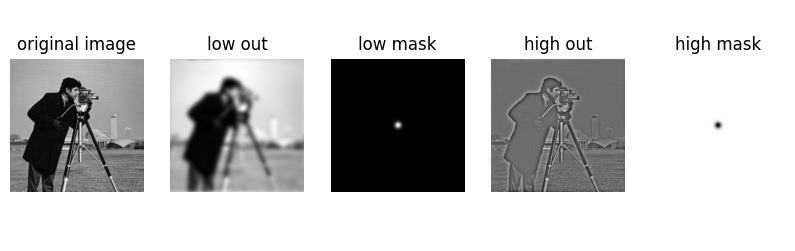

In [ ]:
# @title
radius_low = 10

img= cv2.imread(path + "F1.5.png",cv2.IMREAD_GRAYSCALE)


# Fourier transform
f = np.fft.fft2(img)
# Shift the low frequency component to the center
f = np.fft.fftshift(f)

def gauss_pass(f, cutoff, low = True):
    """
    Gaussian low-pass mask in frequency domain.
    f: 2D array (e.g., shifted FFT)
    cutoff: sigma-like radius controlling cutoff softness
    returns: (result, mask)
    """
    m, n = f.shape
    y = np.arange(m) - (m // 2)
    x = np.arange(n) - (n // 2)
    Y, X = np.meshgrid(y, x, indexing="ij")

    # squared distance from center
    D2 = X*X + Y*Y

    # Gaussian mask (no sqrt needed)
    mask = np.exp(-D2 / (2.0 * radius_low * radius_low))
    if not low: mask = 1 - mask

    return f * mask, mask

f_low_filtered, mask_low = gauss_pass(f,radius_low)
f_hi_filtered, mask_hi = gauss_pass(f,radius_low,False)


# Invert Fourier transform to get the filtered image
# (Invert of FFT(Shift the low-frequency component back to original location))

# fftshift -> ifftshift
img_low = np.real(np.fft.ifft2(np.fft.ifftshift(f_low_filtered)))
img_high = np.real(np.fft.ifft2(np.fft.ifftshift(f_hi_filtered)))

plt.subplots(figsize=(10, 3))
plt.axis('off')

plt.subplot(1,5,1)
plt.imshow(img ,cmap='gray')
plt.title('original image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(img_low ,cmap='gray')
plt.title('low out')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(mask_low ,cmap='gray')
plt.title('low mask')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(img_high ,cmap='gray')
plt.title('high out')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(mask_hi ,cmap='gray')
plt.title('high mask')
plt.axis('off')

plt.show()

---

# Image compression

* Frequency domain is ideal for compression
* Human vision is less sensitive to **high spatial frequencies**
* Discarding high frequencies still preserves perceptual quality

## JPEG Compression

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwtPzO6hOi6NCzjmI32XQg-CmWsnOHrE6jTg&s)

* Image divided into ($8\times8$) blocks
* Each block transformed to frequency domain (Discrete Cosine Tranform)
* High-frequency components are quantized
* Strong quantization → visible artifacts

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Felis_silvestris_silvestris_small_gradual_decrease_of_quality.png)

## Image Forensics

![](https://miro.medium.com/v2/resize:fit:1292/0*NlgxoFORdmICybzY.png)

* Adversarial images may appear normal in spatial domain
* Differences become clearer in frequency space

## Example — What Changed?

* Phase differences are especially noticeable
* Neural networks are sensitive to these changes

## How to detect?
* Fourier spectra can reveal fake images
* Synthetic images often contain:
  * Checkerboard patterns
  * Unnatural frequency artifacts

![](https://ar5iv.labs.arxiv.org/html/1907.06515/assets/figs/checkerboard.png)

*This applies mostly to basic deepfakes made with GANs around 2015-2020. Deepfakes are now much more advanced. Currently some current tricks still hold:*
- Show teeth
- Make complex face movements
- Move face viewing angles
- Look for unique traits (scar, moles)

## How to make one

![](https://www.cs.umd.edu/~tomg/img/dogs_vs_fish.png)

---

# Wavelets

---

## Why Wavelets?

* Fourier transform uses **global sinusoids**
* Excellent frequency resolution, but **no spatial localization**
* Images contain **local structures** (edges, corners, textures)

➡️ Wavelets address this by being **localized in both space and frequency**

---

## What Are Wavelets?

![](https://www.mathworks.com/help/wavelet/gs/sine-wave-and-wavelet.png)

> Fourier analysis consists of breaking up a signal into sine waves of various frequencies. Similarly, wavelet analysis is the breaking up of a signal into shifted and scaled versions of the original (or mother) wavelet.

![](https://upload.wikimedia.org/wikipedia/commons/9/95/Continuous_wavelet_transform.gif)

* **Localized oscillatory basis functions**
* Generated by **scaling** and **shifting** a mother wavelet
* Enable **multiresolution analysis**:

  * Coarse structure
  * Fine details at different scales

---

## Multiresolution Decomposition (Images)

Wavelet transform decomposes an image into subbands:

* **LL**: coarse approximation
* **LH / HL**: horizontal & vertical details
* **HH**: diagonal details

The LL band can be recursively decomposed.

The logic: **Integration in 1D ≈ convolution in 2D**

![](https://www.mdpi.com/electronics/electronics-14-01357/article_deploy/html/images/electronics-14-01357-g002-550.jpg)

![](https://miro.medium.com/v2/resize:fit:1400/0*mb9PgergH2AV20AQ.png)

---

## Why Wavelets Work Well for Compression

* Most image energy lies in:

  * LL band
  * Few large coefficients
* Many coefficients are **near zero**
* Small coefficients can be discarded with minimal visual impact

---

## Wavelet Compression

![](https://jp.mathworks.com/help/wavelet/ug/truecomp1.gif)

Typical pipeline:

1. Wavelet transform
2. Threshold small coefficients
3. Quantize remaining coefficients
4. Entropy encoding

Characteristics:
* Avoids block artifacts
* Preserves edges better at high compression

![](https://jp.mathworks.com/help/wavelet/ug/ch06_advan298.gif)

---

## Wavelets vs Fourier / DCT

* **Fourier / DCT (JPEG)**:
  * Faster and Simple
  * Global or block-based
  * Blocking artifacts at high compression
* **Wavelets (JPEG2000)**:
  * No block boundaries
  * Better edge preservation and localization/multiscale
  * Higher quality at low bitrates

In general:
* **Fourier**: global frequency analysis
* **Wavelets**: local, multiscale structure
* Modern image processing often combines both ideas